In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors
import datetime
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import seaborn as sb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import re
import string
import math
import plotly.express as px
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from scipy.stats import multivariate_normal as mvn
import nltk
import os
import random
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

nltk.download("stopwords")
from nltk.corpus import stopwords
from wordcloud import WordCloud
import spacy
nlp = spacy.load('en_core_web_sm')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.colors as mcolors
from collections import Counter
from matplotlib.ticker import FuncFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [158]:
O_NET = pd.read_excel('O_NET Task Statements.xlsx')
O_NET.head()

,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source,task_automation
0,11-1011.00,Chief Executives,8823,"Direct or coordinate an organization's financial or budget activities to fund operations, maximize investments, or increase efficiency.",Core,87.0,07/2014,Incumbent,0.0
1,11-1011.00,Chief Executives,8831,Appoint department heads or managers and assign or delegate responsibilities to them.,Core,87.0,07/2014,Incumbent,0.0
2,11-1011.00,Chief Executives,8825,"Analyze operations to evaluate performance of a company or its staff in meeting objectives or to determine areas of potential cost reduction, program improvement, or policy change.",Core,87.0,07/2014,Incumbent,0.0
3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objectives, or activities of organizations or businesses to ensure continuing operations, to maximize returns on investments, or to increase productivity.",Core,87.0,07/2014,Incumbent,0.0
4,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those for funding or implementation of programs.",Core,87.0,07/2014,Incumbent,0.0


In [4]:
O_NET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19695 entries, 0 to 19694
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   O*NET-SOC Code         19695 non-null  object 
 1   Title                  19695 non-null  object 
 2   Task ID                19695 non-null  int64  
 3   Task                   19695 non-null  object 
 4   Task Type              19498 non-null  object 
 5   Incumbents Responding  19498 non-null  float64
 6   Date                   19695 non-null  object 
 7   Domain Source          19695 non-null  object 
 8   task_automation        1824 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


In [5]:
print("Shape of data=>",O_NET.shape)

Shape of data=> (19695, 9)


In [6]:
df=O_NET.groupby('O*NET-SOC Code').filter(lambda x:len(x)>0).reset_index(drop=True)
print('Number of unique Job Codes=>',len(df['O*NET-SOC Code'].unique()))

Number of unique Job Codes=> 974


In [7]:
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)

In [156]:
O_NET['Title'].value_counts().head()

Jewelers                                                                         40
Special Education Teachers, Secondary School                                     40
Telecommunications Equipment Installers and Repairers, Except Line Installers    40
Special Education Teachers, Middle School                                        40
Special Education Teachers, Kindergarten and Elementary School                   40
Name: Title, dtype: int64

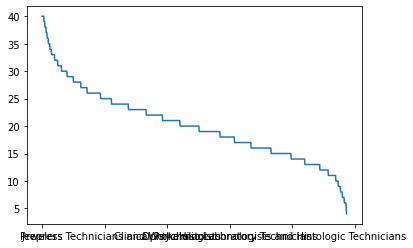

In [9]:
O_NET['Title'].value_counts().plot()

In [10]:
x = O_NET.groupby('Title')
df_grouped=O_NET[['Title','Task']].groupby(by='Title').agg(lambda x:' '.join(x))

In [11]:
df_grouped['Task_Cleaned_Count_Sorted']=df_grouped['Task'].apply(lambda x: x.lower()) #Convert all to lowercase
df_grouped['Task_Cleaned_Count_Sorted']=df_grouped['Task_Cleaned_Count_Sorted'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x)) #Remove Punctuations

In [12]:
#Stop Words Removal
sw_nltk = stopwords.words('english')
df_grouped['Task_Cleaned_Count_Sorted'] = df_grouped['Task_Cleaned_Count_Sorted'].apply(lambda x: ' '.join([item for item in x.split() if item not in sw_nltk]))

In [13]:
#Tokenize & Lemmatize Words
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df_grouped['Task_Cleaned_Count_Sorted'] = df_grouped['Task_Cleaned_Count_Sorted'].apply(lemmatize_text)

In [14]:
from collections import Counter
df_grouped['Task_Cleaned_Count_Sorted'] = df_grouped['Task_Cleaned_Count_Sorted'].apply(Counter)

In [15]:
#Sort Dictionary in each row
for x in range(len(df_grouped)):
    df_grouped['Task_Cleaned_Count_Sorted'][x] = sorted(df_grouped['Task_Cleaned_Count_Sorted'][x].items(), key=lambda x: x[1], reverse=True) # for decreasing order

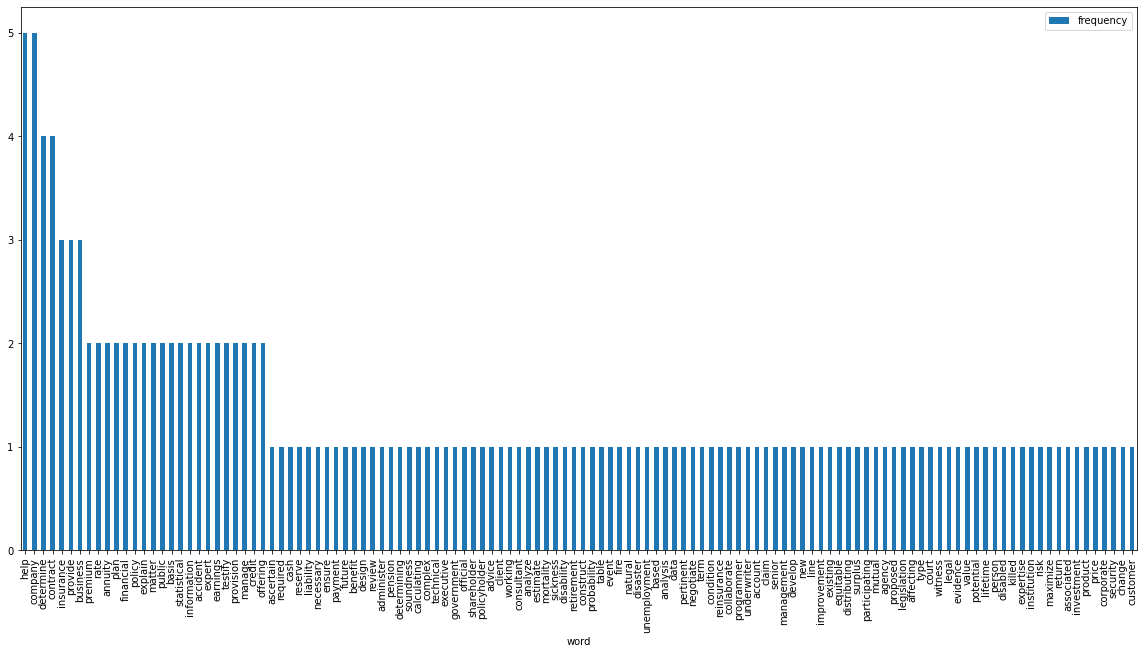

In [18]:
#Key number range from 0 to 973 to generate Sorted Histogram
plt.rcParams["figure.figsize"] = (20, 10)
df2 = pd.DataFrame(df_grouped['Task_Cleaned_Count_Sorted'][2], columns=['word', 'frequency'])
df2.plot(kind='bar', x='word')

In [160]:
# all job descriptions combined

all_task = ''

for i in df_grouped['Task']:
  all_task += i

all_task

all_task = all_task.lower()
all_task = re.sub('[%s]' % re.escape(string.punctuation), '',all_task)
#Stop Words Removal
all_task = ' '.join([item for item in all_task.split() if item not in sw_nltk])
all_task = lemmatize_text(all_task)
all_task = Counter(all_task)
all_task = sorted(all_task.items(), key=lambda x:x[1], reverse = True)

all_task[:30]

[('using', 2150),
 ('equipment', 2115),
 ('material', 1374),
 ('system', 1143),
 ('prepare', 986),
 ('determine', 973),
 ('maintain', 965),
 ('information', 950),
 ('product', 940),
 ('work', 921),
 ('record', 894),
 ('machine', 863),
 ('develop', 832),
 ('plan', 827),
 ('ensure', 827),
 ('test', 780),
 ('tool', 765),
 ('activity', 735),
 ('student', 727),
 ('provide', 724),
 ('procedure', 718),
 ('patient', 718),
 ('data', 715),
 ('design', 708),
 ('program', 677),
 ('report', 676),
 ('service', 654),
 ('repair', 650),
 ('part', 611),
 ('perform', 595)]

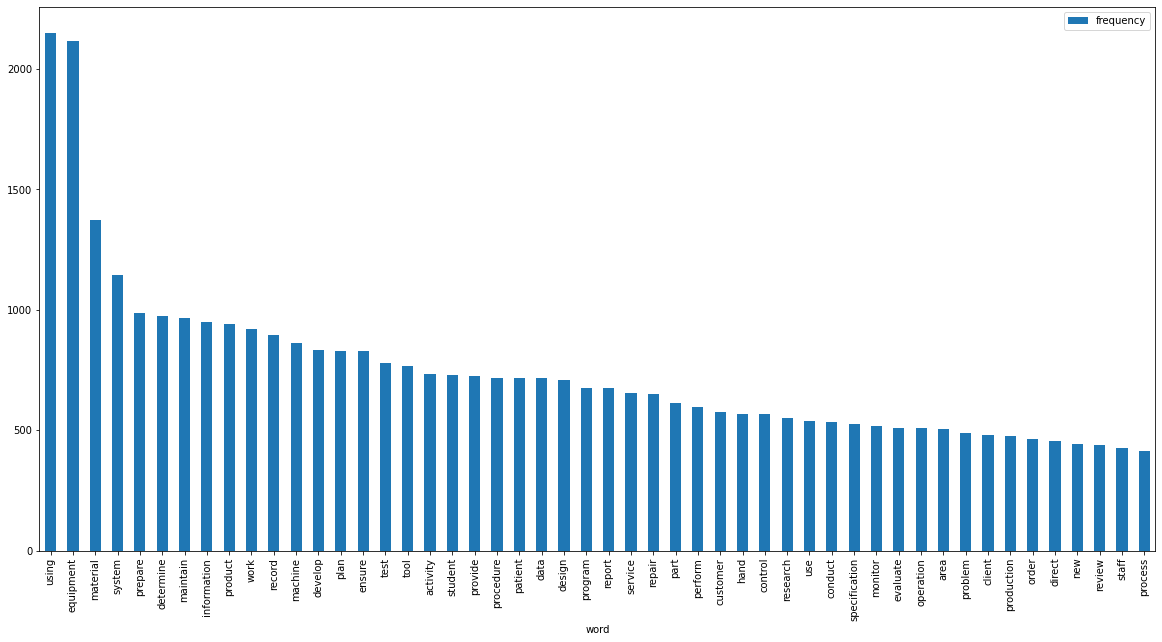

In [21]:
# Top 50 words for all job descriptions
plt.rcParams["figure.figsize"] = (20, 10)
df3= pd.DataFrame(all_task[:50])
df3.columns = ['word', 'frequency']
df3.plot(kind='bar', x='word')

## Top Common Words



In [23]:
# top 50 verbs from all descriptions
all_task = ''

for i in df_grouped['Task']:
  all_task += i

all_task

all_task = all_task.lower()
all_task = re.sub('[%s]' % re.escape(string.punctuation), '',all_task)
#Stop Words Removal
all_task = ' '.join([item for item in all_task.split() if item not in sw_nltk])
all_task = lemmatize_text(all_task)
#all_task = Counter(all_task)
#all_task = sorted(all_task.items(), key=lambda x:x[1], reverse = True)

#text = [x[0] for x in all_task]
result = nltk.pos_tag(all_task)
verb_only = [i for i in result if i[1].lower() == 'vb']

verbs_only_counted = Counter([x[0] for x in verb_only])
verbs_only_counted = sorted(verbs_only_counted.items(), key=lambda x:x[1], reverse = True)
verbs_only_counted[:50]

[('ensure', 827),
 ('develop', 679),
 ('obtain', 306),
 ('remove', 264),
 ('identify', 196),
 ('replace', 172),
 ('establish', 159),
 ('keep', 136),
 ('improve', 131),
 ('participate', 129),
 ('perform', 94),
 ('take', 85),
 ('prepare', 82),
 ('reduce', 78),
 ('apply', 74),
 ('determine', 64),
 ('evaluate', 48),
 ('provide', 46),
 ('organize', 39),
 ('approve', 38),
 ('resolve', 38),
 ('minimize', 37),
 ('drill', 32),
 ('maximize', 30),
 ('recommend', 29),
 ('modify', 29),
 ('stop', 27),
 ('check', 25),
 ('run', 19),
 ('meet', 19),
 ('deliver', 19),
 ('install', 19),
 ('operate', 19),
 ('verify', 19),
 ('sell', 18),
 ('investigate', 18),
 ('advise', 18),
 ('review', 15),
 ('maintain', 15),
 ('start', 14),
 ('regulate', 13),
 ('raise', 12),
 ('make', 12),
 ('testify', 11),
 ('switch', 11),
 ('add', 11),
 ('write', 10),
 ('acquire', 10),
 ('serve', 10),
 ('build', 10)]

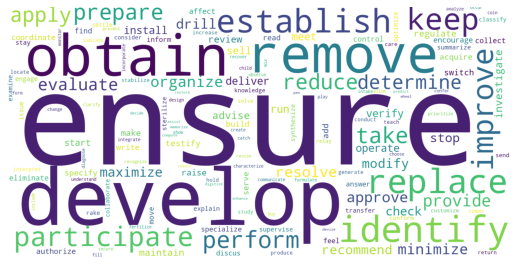

In [24]:
# word cloud for verbs

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
to_add = []

for i in to_add:
    stopwords.add(i)

all_task = ''

for i in df_grouped['Task']:
  all_task += i

all_task

all_task = all_task.lower()
all_task = re.sub('[%s]' % re.escape(string.punctuation), '',all_task)
#Stop Words Removal
all_task = ' '.join([item for item in all_task.split() if item not in sw_nltk])

wordcloud = WordCloud(collocations = False,
                          width=1600, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          #max_font_size=40, 
                          random_state=42
                         ).generate(' '.join([x[0] for x in verb_only])) # can't pass a series, needs to be strings and function computes frequencies
print(wordcloud)
plt.figure(figsize=(9,8))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

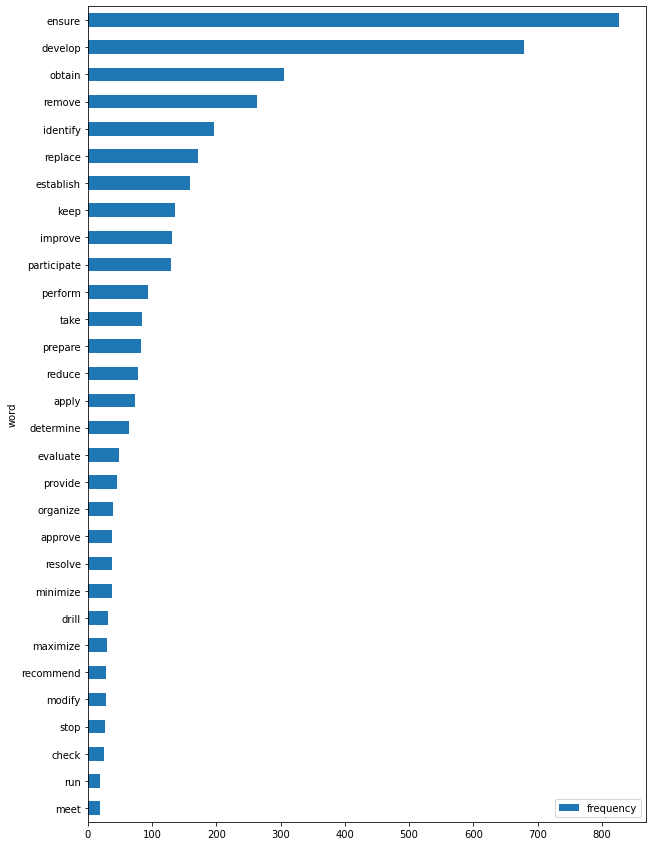

In [25]:
#top 50 verbs
plt.rcParams["figure.figsize"] = (10, 15)
df2 = pd.DataFrame(verbs_only_counted[:30], columns=['word', 'frequency']).sort_values('frequency', ascending = True)
df2.plot(kind='barh', x='word')

In [26]:
# verbs that occured for more than 200 times should be removed in the clustering. 
common_words_to_be_removed = ['ensure', 'develop', 'obtain', 'remove']

#Interpretation to differences in jobs across different levels of the organisation

Is there an interesting `interpretation to differences in jobs across different levels of the organisation`? I.e. differences between CEOs or low-level management?

In [157]:
#kris (20th Nov)
O_NET['Major_group'] = O_NET['O*NET-SOC Code'].str[:2]
O_NET
print("Shape of data=>",O_NET.shape)
df=O_NET.groupby('O*NET-SOC Code').filter(lambda x:len(x)>0).reset_index(drop=True)
print('Number of unique Job Codes=>',len(df['O*NET-SOC Code'].unique()))

pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
O_NET['Title'].value_counts().head()

Shape of data=> (19695, 10)
Number of unique Job Codes=> 974


Jewelers                                                                         40
Special Education Teachers, Secondary School                                     40
Telecommunications Equipment Installers and Repairers, Except Line Installers    40
Special Education Teachers, Middle School                                        40
Special Education Teachers, Kindergarten and Elementary School                   40
Name: Title, dtype: int64

In [29]:
x = O_NET.groupby('Title')
df_grouped=O_NET[['Title','Task']].groupby(by='Title').agg(lambda x:' '.join(x))

In [2]:
x1 = O_NET.groupby('Major_group')
df_grouped1=O_NET[['Major_group','Task']].groupby(by='Major_group').agg(lambda x:' '.join(x))

In [31]:
O_NET.groupby('Major_group').nunique()

,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source,task_automation
Major_group,,,,,,,,,
11,59,59,1301,1293,2,77,12,3,2
13,51,51,995,992,2,61,13,3,2
15,33,33,697,691,2,34,10,3,2
17,71,71,1447,1437,2,78,10,3,2
19,60,60,1181,1177,2,75,13,3,2
21,14,14,291,290,2,32,7,2,2
23,8,8,134,134,2,21,6,2,2
25,61,61,1626,678,2,87,9,2,2
27,43,43,825,824,2,54,12,2,2


In [1]:
df_grouped1['Task_Cleaned_Count_Sorted']=df_grouped1['Task'].apply(lambda x1: x1.lower()) #Convert all to lowercase
df_grouped1['Task_Cleaned_Count_Sorted']=df_grouped1['Task_Cleaned_Count_Sorted'].apply(lambda x1: re.sub('[%s]' % re.escape(string.punctuation), '', x1)) #Remove Punctuations
#sw_nltk = stopwords.words('english')
df_grouped1['Task_Cleaned_Count_Sorted'] = df_grouped1['Task_Cleaned_Count_Sorted'].apply(lambda x1: ' '.join([item for item in x1.split() if item not in sw_nltk]))
df_grouped1['Task_Cleaned_Count_Sorted'] = df_grouped1['Task_Cleaned_Count_Sorted'].apply(lemmatize_text)
df_grouped1['Task_Cleaned_Count_Sorted'] = df_grouped1['Task_Cleaned_Count_Sorted'].apply(Counter)
for x in range(len(df_grouped1)):
    df_grouped1['Task_Cleaned_Count_Sorted'][x] = sorted(df_grouped1['Task_Cleaned_Count_Sorted'][x].items(), key=lambda x: x[1], reverse=True) # for decreasing order


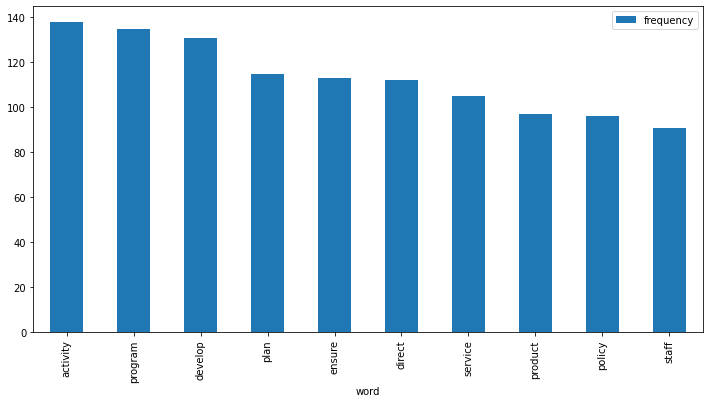

In [102]:

plt.rcParams["figure.figsize"] = (12, 6)
df2_mgt = pd.DataFrame(df_grouped1['Task_Cleaned_Count_Sorted'][0][:10], columns=['word', 'frequency'])
df2_mgt.plot(kind='bar', x='word')

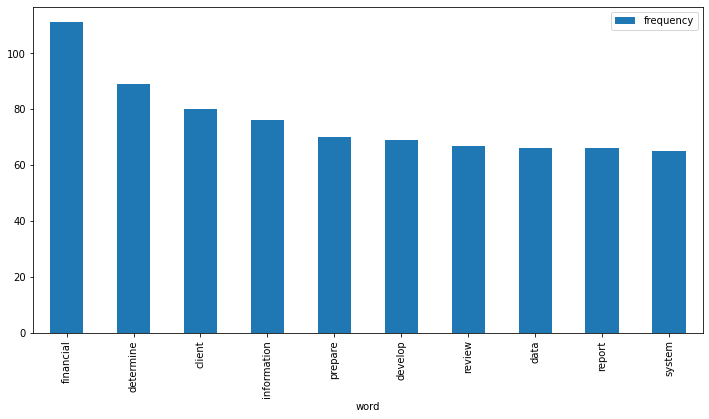

In [105]:

plt.rcParams["figure.figsize"] = (12, 6)
df2_BFops = pd.DataFrame(df_grouped1['Task_Cleaned_Count_Sorted'][1][:10], columns=['word', 'frequency'])
df2_BFops.plot(kind='bar', x='word')

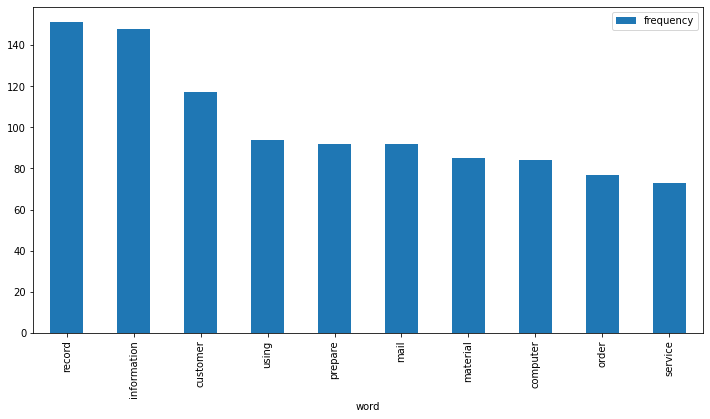

In [106]:

plt.rcParams["figure.figsize"] = (12, 6)
df2_ofcadmin = pd.DataFrame(df_grouped1['Task_Cleaned_Count_Sorted'][16][:10], columns=['word', 'frequency'])
df2_ofcadmin.plot(kind='bar', x='word')

# Example of Jobs

In [36]:
O_NET_Verb = O_NET.copy()

O_NET_Verb['Task_Cleaned_Count_Sorted']=O_NET_Verb['Task'].apply(lambda x1: x1.lower()) #Convert all to lowercase
O_NET_Verb['Task_Cleaned_Count_Sorted']=O_NET_Verb['Task_Cleaned_Count_Sorted'].apply(lambda x1: re.sub('[%s]' % re.escape(string.punctuation), '', x1)) #Remove Punctuations
#sw_nltk = stopwords.words('english')
#O_NET_Verb['Task_Cleaned_Count_Sorted'] = O_NET_Verb['Task_Cleaned_Count_Sorted'].apply(lambda x1: ' '.join([item for item in x1.split() if item not in sw_nltk]))
O_NET_Verb['Task_Cleaned_Count_Sorted'] = O_NET_Verb['Task_Cleaned_Count_Sorted'].apply(lemmatize_text)
#O_NET_Verb['Task_Cleaned_Count_Sorted'] = O_NET_Verb['Task_Cleaned_Count_Sorted'].apply(Counter)
O_NET_Verb['Task_Cleaned_Count_Sorted'] = O_NET_Verb['Task_Cleaned_Count_Sorted'].apply(lambda x: [i for i in x if i not in common_words_to_be_removed])
O_NET_Verb['Task_Verb'] = O_NET_Verb['Task_Cleaned_Count_Sorted'].apply(lambda x: nltk.pos_tag(x))
O_NET_Verb['Task_Verb'] = O_NET_Verb['Task_Verb'].apply(lambda x: [i[0] for i in x if i[1].lower() == 'vb'])
# extract only the first three verbs of each task, then join all tasks togther for each job title
O_NET_Verb['Task_Verb_first_three'] = O_NET_Verb['Task_Verb'].apply(lambda x:x[:3])
O_NET_Verb['Task_Verb_String_first_three'] = O_NET_Verb['Task_Verb_first_three'].apply(lambda x:' '.join(x))
O_NET_Verb[['Title','Task_Verb_String_first_three']].head(10)
O_NET_Verb_Title = O_NET_Verb[['Title','Task_Verb_String_first_three']].groupby(by='Title').agg(lambda x:' '.join(x))
O_NET_Verb_Title = O_NET_Verb_Title.reset_index()
O_NET_Verb_Title.head()

O_NET_Verb_Title[O_NET_Verb_Title['Title'].isin(['Chief Executives','Meeting, Convention, and Event Planners','Cashiers'])]

,Title,Task_Verb_String_first_three
119,Cashiers,answer provide find refund provide establish identify reconcile keep determine redeem check
128,Chief Executives,coordinate fund maximize evaluate determine maximize increase discus solve establish serve approve coordinate review recommend suggest promote recommend promote support make legislative resolve testify serve participate promote delegate do approve
573,"Meeting, Convention, and Event Planners",determine approve coordinate determine be inquiry plan establish monitor keep choose publicize erect serve


# K-means clustering to cluster together jobs that are similar based on first three verbs of every tasks associated with each job title 

In [37]:
import numpy as np
import pandas as pd 
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [122]:
O_NET.head()

,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source,task_automation,Major_group
0,11-1011.00,Chief Executives,8823,"Direct or coordinate an organization's financial or budget activities to fund operations, maximize investments, or increase efficiency.",Core,87.0,07/2014,Incumbent,0.0,11
1,11-1011.00,Chief Executives,8831,Appoint department heads or managers and assign or delegate responsibilities to them.,Core,87.0,07/2014,Incumbent,0.0,11
2,11-1011.00,Chief Executives,8825,"Analyze operations to evaluate performance of a company or its staff in meeting objectives or to determine areas of potential cost reduction, program improvement, or policy change.",Core,87.0,07/2014,Incumbent,0.0,11
3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objectives, or activities of organizations or businesses to ensure continuing operations, to maximize returns on investments, or to increase productivity.",Core,87.0,07/2014,Incumbent,0.0,11
4,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those for funding or implementation of programs.",Core,87.0,07/2014,Incumbent,0.0,11


In [39]:
data = df_grouped['Task']
data.reset_index().head()

,Title,Task
0,Accountants,"Develop, maintain, and analyze budgets, preparing periodic reports that compare budgeted costs to actual costs. Prepare, examine, or analyze accounting records, financial statements, or other financial reports to assess accuracy, completeness, and conformance to reporting and procedural standards. Review accounts for discrepancies and reconcile differences. Prepare adjusting journal entries. Establish tables of accounts and assign entries to proper accounts. Analyze business operations, trends, costs, revenues, financial commitments, and obligations to project future revenues and expenses or to provide advice. Report to management regarding the finances of establishment. Develop, implement, modify, and document recordkeeping and accounting systems, making use of current computer technology. Advise management about issues such as resource utilization, tax strategies, and the assumptions underlying budget forecasts. Maintain or examine the records of government agencies. Compute taxes owed and prepare tax returns, ensuring compliance with payment, reporting, or other tax requirements. Advise clients in areas such as compensation, employee health care benefits, the design of accounting or data processing systems, or long-range tax or estate plans. Represent clients before taxing authorities and provide support during litigation involving financial issues. Provide internal and external auditing services for businesses or individuals. Prepare forms and manuals for accounting and bookkeeping personnel and direct their work activities. Appraise, evaluate, and inventory real property and equipment, recording information such as the description, value, and location of property. Survey operations to ascertain accounting needs and to recommend, develop, or maintain solutions to business and financial problems."
1,Actors,"Collaborate with other actors as part of an ensemble. Portray and interpret roles, using speech, gestures, and body movements, to entertain, inform, or instruct radio, film, television, or live audiences. Work closely with directors, other actors, and playwrights to find the interpretation most suited to the role. Perform humorous and serious interpretations of emotions, actions, and situations, using body movements, facial expressions, and gestures. Study and rehearse roles from scripts to interpret, learn and memorize lines, stunts, and cues as directed. Learn about characters in scripts and their relationships to each other to develop role interpretations. Attend auditions and casting calls to audition for roles. Sing or dance during dramatic or comedic performances. Work with other crew members responsible for lighting, costumes, make-up, and props. Tell jokes, perform comic dances, songs and skits, impersonate mannerisms and voices of others, contort face, and use other devices to amuse audiences. Read from scripts or books to narrate action or to inform or entertain audiences, utilizing few or no stage props. Promote productions using means such as interviews about plays or movies. Prepare and perform action stunts for motion picture, television, or stage productions. Write original or adapted material for dramas, comedies, puppet shows, narration, or other performances. Introduce performances and performers to stimulate excitement and coordinate smooth transition of acts during events. Dress in comical clown costumes and makeup, and perform comedy routines to entertain audiences. Construct puppets and ventriloquist dummies, and sew accessory clothing, using hand tools and machines. Perform original and stock tricks of illusion to entertain and mystify audiences, occasionally including audience members as participants. Manipulate strings, wires, rods, or fingers to animate puppets or dummies in synchronization with talking, singing, or recorded programs."
2,Actuaries,"Ascertain premium rates required and cash reserves and liabilities necessary to ensure payment of future benefits. Design,

In [40]:
O_NET_Verb = O_NET.copy()

O_NET_Verb['Task_Cleaned_Count_Sorted']=O_NET_Verb['Task'].apply(lambda x1: x1.lower()) #Convert all to lowercase
O_NET_Verb['Task_Cleaned_Count_Sorted']=O_NET_Verb['Task_Cleaned_Count_Sorted'].apply(lambda x1: re.sub('[%s]' % re.escape(string.punctuation), '', x1)) #Remove Punctuations
#sw_nltk = stopwords.words('english')
#O_NET_Verb['Task_Cleaned_Count_Sorted'] = O_NET_Verb['Task_Cleaned_Count_Sorted'].apply(lambda x1: ' '.join([item for item in x1.split() if item not in sw_nltk]))
O_NET_Verb['Task_Cleaned_Count_Sorted'] = O_NET_Verb['Task_Cleaned_Count_Sorted'].apply(lemmatize_text)
#O_NET_Verb['Task_Cleaned_Count_Sorted'] = O_NET_Verb['Task_Cleaned_Count_Sorted'].apply(Counter)

In [41]:
O_NET_Verb['Task_Cleaned_Count_Sorted'].head()

0                                                             [direct, or, coordinate, an, organization, financial, or, budget, activity, to, fund, operation, maximize, investment, or, increase, efficiency]
1                                                                                                                [appoint, department, head, or, manager, and, assign, or, delegate, responsibility, to, them]
2    [analyze, operation, to, evaluate, performance, of, a, company, or, it, staff, in, meeting, objective, or, to, determine, area, of, potential, cost, reduction, program, improvement, or, policy, change]
3      [direct, plan, or, implement, policy, objective, or, activity, of, organization, or, business, to, ensure, continuing, operation, to, maximize, return, on, investment, or, to, increase, productivity]
4                                                                                                            [prepare, budget, for, approval, including, those, for, funding

In [42]:
common_words_to_be_removed

['ensure', 'develop', 'obtain', 'remove']

In [43]:
O_NET_Verb['Task_Cleaned_Count_Sorted'] = O_NET_Verb['Task_Cleaned_Count_Sorted'].apply(lambda x: [i for i in x if i not in common_words_to_be_removed])
O_NET_Verb['Task_Verb'] = O_NET_Verb['Task_Cleaned_Count_Sorted'].apply(lambda x: nltk.pos_tag(x))
O_NET_Verb['Task_Verb'] = O_NET_Verb['Task_Verb'].apply(lambda x: [i[0] for i in x if i[1].lower() == 'vb'])
# extract only the first three verbs of each task, then join all tasks togther for each job title
O_NET_Verb['Task_Verb_first_three'] = O_NET_Verb['Task_Verb'].apply(lambda x:x[:3])
O_NET_Verb['Task_Verb_String_first_three'] = O_NET_Verb['Task_Verb_first_three'].apply(lambda x:' '.join(x))

O_NET_Verb[['Title','Task_Verb_String_first_three']].head(10)


,Title,Task_Verb_String_first_three
0,Chief Executives,coordinate fund maximize
1,Chief Executives,
2,Chief Executives,evaluate determine
3,Chief Executives,maximize increase
4,Chief Executives,
5,Chief Executives,discus
6,Chief Executives,solve
7,Chief Executives,
8,Chief Executives,establish
9,Chief Executives,serve


In [44]:
O_NET_Verb_Title = O_NET_Verb[['Title','Task_Verb_String_first_three']].groupby(by='Title').agg(lambda x:' '.join(x))
O_NET_Verb_Title = O_NET_Verb_Title.reset_index()
O_NET_Verb_Title.head()

,Title,Task_Verb_String_first_three
0,Accountants,ass establish proper project provide advise examine provide provide direct ascertain recommend maintain
1,Actors,entertain find interpret memorize tell perform use narrate inform entertain perform stimulate coordinate perform entertain entertain mystify animate
2,Actuaries,help determine explain provide estimate help provide help maximize help
3,Acupuncturists,provide follow identify make recommend make treat consider patient apply patient
4,Acute Care Nurses,result ass plan coordinate plan manage ass perform provide participate keep observe interpret costbenefit


In [45]:
data.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   974 non-null    object
 1   Task    974 non-null    object
dtypes: object(2)
memory usage: 15.3+ KB


In [121]:
data = O_NET_Verb_Title['Task_Verb_String_first_three']
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = O_NET_Verb_Title['Task_Verb_String_first_three']
tf_idf_vectorizor = TfidfVectorizer(stop_words = stopwords,#tokenizer = tokenize_and_stem,
                             max_features = 5000)
%time tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

CPU times: user 34.1 ms, sys: 0 ns, total: 34.1 ms
Wall time: 35.1 ms


,abrasion,abrasive,accept,accident,accommodate,accompany,accomplish,account,accretion,accuracy,accurate,accustom,achieve,acid,acidize,acquaint,acquire,act,activate,actor,adapt,add,address,adequate,adhere,adherence,adjacent,adjust,administer,admit,adopt,adult,advance,adverse,advertise,advise,affect,affix,agriculture,aid,...,warn,wash,watch,waterproof,watertight,wax,wayside,wear,weather,weatherproof,web,weed,weigh,weight,weld,well,wellhead,wellness,wet,wharf,whiten,wholesale,wildlife,win,wind,windshield,winner,wire,wired,withdraw,wood,woodlot,work,worker,workpiece,worksheet,wrap,wrinkle,write,yield
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269471,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Columns: 1572 entries, abrasion to yield
dtypes: float64(1572)
memory usage: 11.7 MB


(-15.0, 15.0)

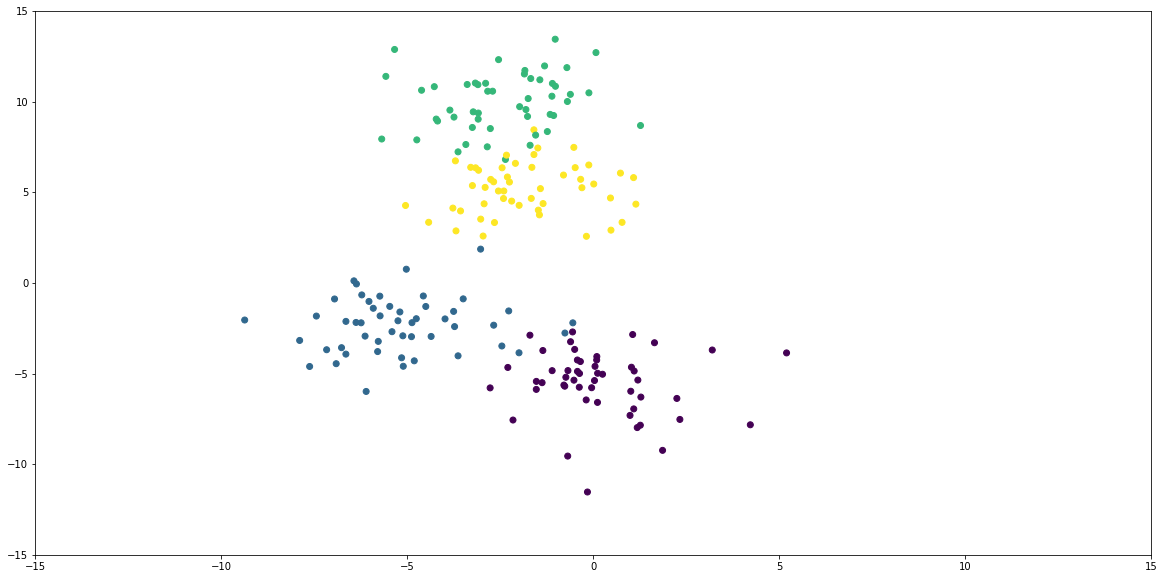

In [49]:
from sklearn.datasets import make_blobs
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)
# create np array for data points
points = data[0]
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

In [138]:
X = data[0]


In [51]:
tf_idf_array[5]

array([0., 0., 0., ..., 0., 0., 0.])

In [52]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components = 10)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
Y_sklearn

array([[ 0.00615401,  0.21611001,  0.18144866, ..., -0.1044675 ,
         0.1852333 , -0.13775326],
       [ 0.00039676, -0.05289273,  0.06112736, ...,  0.01375275,
        -0.07534924,  0.02908351],
       [-0.05253634,  0.11879814,  0.14185141, ..., -0.01767529,
        -0.0249361 , -0.03648568],
       ...,
       [-0.09147023, -0.25611602,  0.00682582, ...,  0.0949634 ,
         0.04002489,  0.01681919],
       [-0.00582457, -0.11841604,  0.16131779, ..., -0.05699302,
        -0.00839263,  0.08064131],
       [-0.0293975 , -0.03528213, -0.00419593, ...,  0.07528671,
        -0.14643506, -0.12798415]])

In [53]:
n_clusters=4
kmeans = KMeans(n_clusters= n_clusters, max_iter=600, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

data = df_grouped['Task']
data.reset_index().head()
prediction_df = pd.concat([df_grouped.reset_index()['Title'], pd.DataFrame(prediction, columns = ['Prediction'])], axis=1)         

CPU times: user 311 ms, sys: 161 ms, total: 472 ms
Wall time: 242 ms


In [54]:
job_titles_clsuters = pd.DataFrame()

for i in set(prediction_df['Prediction']):
      list_of_jobs = []
      for j in list(prediction_df.loc[prediction_df['Prediction']==i, 'Title']):
        list_of_jobs.append(j)
      print('cluster: ', i,' ',list_of_jobs)
      print('\n')

cluster:  0   ['Actors', 'Actuaries', 'Acupuncturists', 'Adhesive Bonding Machine Operators and Tenders', 'Agricultural Equipment Operators', 'Agricultural Inspectors', 'Agricultural Technicians', 'Air Traffic Controllers', 'Aircraft Cargo Handling Supervisors', 'Airfield Operations Specialists', 'Airline Pilots, Copilots, and Flight Engineers', 'Allergists and Immunologists', 'Amusement and Recreation Attendants', 'Anesthesiologist Assistants', 'Anesthesiologists', 'Animal Breeders', 'Animal Control Workers', 'Animal Trainers', 'Arbitrators, Mediators, and Conciliators', 'Architects, Except Landscape and Naval', 'Architectural Drafters', 'Archivists', 'Art Therapists', 'Astronomers', 'Atmospheric and Space Scientists', 'Audio and Video Equipment Technicians', 'Audio-Visual and Multimedia Collections Specialists', 'Baggage Porters and Bellhops', 'Bailiffs', 'Bakers', 'Barbers', 'Baristas', 'Bartenders', 'Bill and Account Collectors', 'Billing, Cost, and Rate Clerks', 'Biochemists and B

In [140]:
prediction_df.sort_values('Prediction').to_csv('prediction_df.csv')
prediction_df.sort_values('Prediction').head()

,Title,Prediction
486,Jewelers,0
555,"Meat, Poultry, and Fish Cutters and Trimmers",0
557,Mechanical Drafters,0
561,Mechatronics Engineers,0
562,Medical Appliance Technicians,0


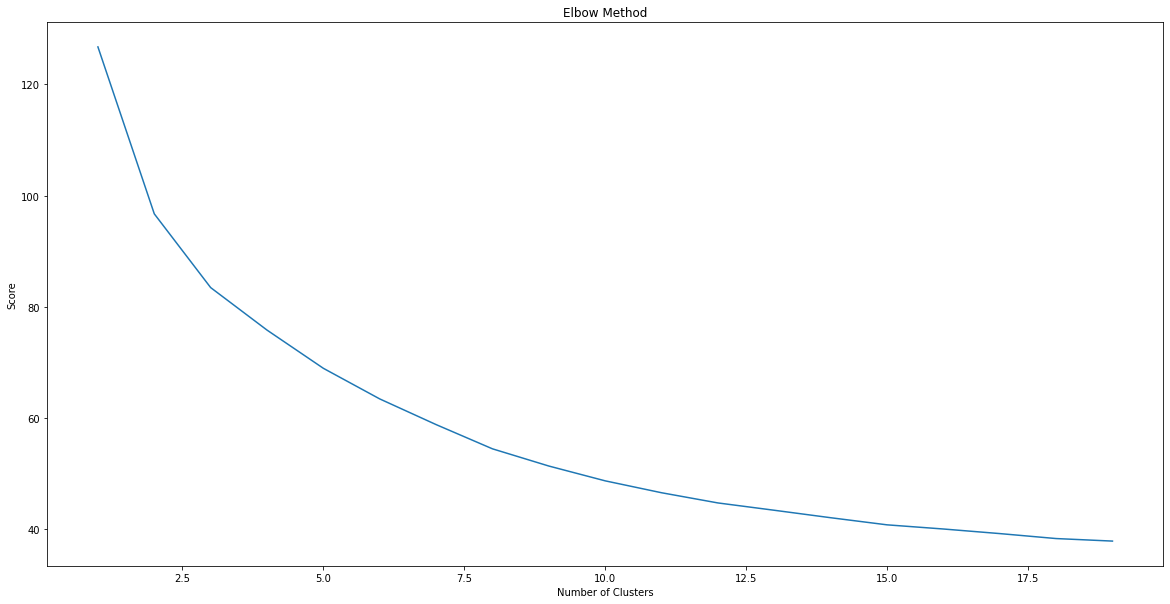

In [57]:
number_clusters = range(1, 20)
kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score = [i*-1 for i in score]

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [58]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        print(best_features)
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs, best_features

dfs = get_top_features_cluster(tf_idf_array, prediction, 30)[0]

[('determine', 0.06568257975181657), ('provide', 0.05985910625141528), ('prepare', 0.05032420681922835), ('perform', 0.04507460851051217), ('make', 0.03975129916662465), ('maintain', 0.037171633015415845), ('verify', 0.033266470255182944), ('detect', 0.02980780738150202), ('keep', 0.029467205342356147), ('take', 0.028367997091488687), ('operate', 0.027789526019479968), ('check', 0.02619957158174357), ('produce', 0.022799977231651253), ('apply', 0.022236562220380562), ('patient', 0.018021734475966736), ('serve', 0.01773504209105562), ('answer', 0.017418348118246958), ('start', 0.017341284980163792), ('prevent', 0.016129323050755724), ('regulate', 0.015996393677705594), ('create', 0.01596075348906982), ('control', 0.015542146918530043), ('set', 0.015380152322626486), ('identify', 0.015339072091321976), ('resolve', 0.015116667862873563), ('form', 0.014799810766198263), ('move', 0.014759757996001443), ('establish', 0.014629351347117422), ('organize', 0.014383030059576706), ('appropriate', 

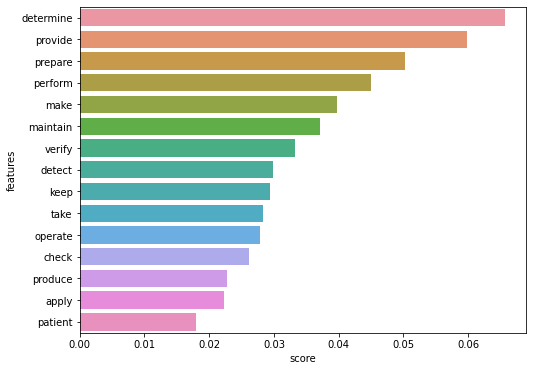

In [59]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[0][:15])

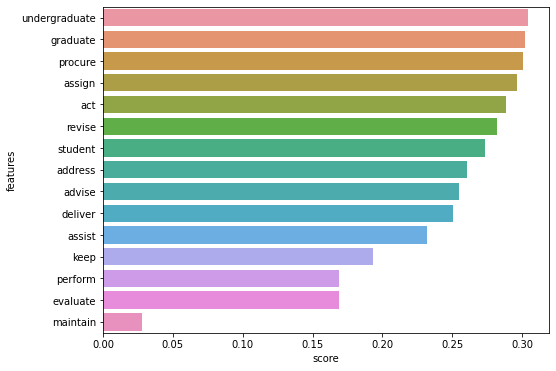

In [60]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[1][:15])

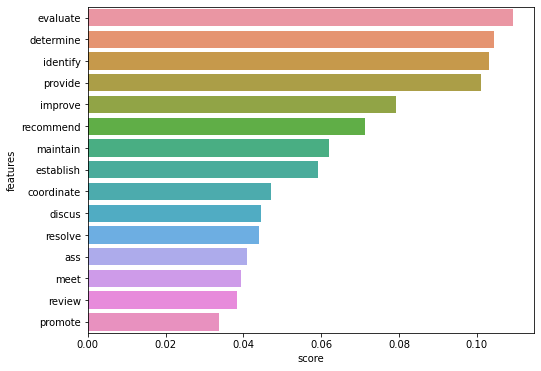

In [61]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[2][:15])

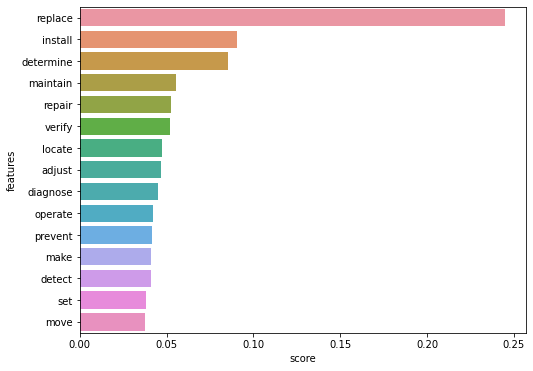

In [62]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[3][:15])

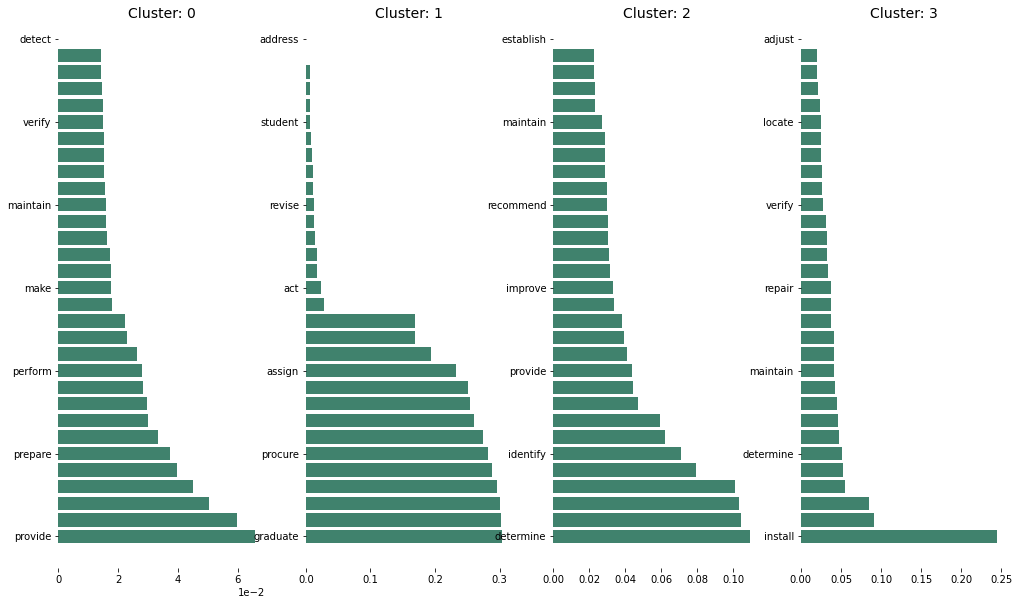

In [64]:
def plot_features(dfs):
    fig = plt.figure(figsize=(17,10))
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.set_title("Cluster: "+ str(i), fontsize = 14)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#40826d')
        yticks = ax.set_yticklabels(df.features)
    plt.show();
plot_features(dfs)

In [65]:
prediction_df.sort_values('Prediction').to_csv('prediction_df.csv')

In [108]:
raw = O_NET.copy()
master = raw[['Task ID', 'Title', 'Task Type', 'task_automation']]
model_raw = raw[['Task ID', 'Task']]
model_raw.head()

model_processed = model_raw.copy()
model_processed['Task_Cleaned'] = model_processed['Task'].apply(lambda x: x.lower()) 
#Remove Punctuations
model_processed['Task_Cleaned']=model_processed['Task_Cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x)) 
#Stop Words Removal
#sw_nltk = stopwords.words('english')
model_processed['Task_Cleaned'] = model_processed['Task_Cleaned'].apply(lambda x: ' '.join([item for item in x.split() if item not in sw_nltk]))
#Tokenize & Lemmatize Words
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
model_processed['Task_Cleaned'] = model_processed['Task_Cleaned'].apply(lemmatize_text)
model_processed.head()

# only use the 1st word from each task
data = model_processed['Task_Cleaned'].apply(lambda x: ','.join(map(str, x))).to_frame()
data = data['Task_Cleaned'].apply(lambda x: x.split(',')[0])

tf_idf_vectorizor = TfidfVectorizer(max_features = 1000)

tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
model_processed_final = pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names())
model_processed_final.head()

temp = pd.merge(model_processed, master)
temp = temp[temp['task_automation'].isin([0,1])]
temp1 = temp['Task_Cleaned'].apply(lambda x: ','.join(map(str, x))).to_frame()
temp1 = temp1['Task_Cleaned'].apply(lambda x: x.split(',')[0]).to_frame('keyVerb')
final = pd.concat([temp[['Task ID', 'Title', 'task_automation']].reset_index(drop = True), temp1.reset_index(drop = True)], axis = 1)
final1 = final.groupby(['keyVerb']).size().to_frame().reset_index()
final2 = final.groupby(['keyVerb'])['task_automation'].sum().to_frame().reset_index()

final = pd.merge(final1, final2)
final.columns = ['Verb', 'count', 'automation_score']
final['automation_score'] = final['automation_score']/final['count']

final.sort_values(by = 'count', ascending = False).head(10)

,Verb,count,automation_score
239,prepare,82,0.329268
227,perform,49,0.285714
251,provide,47,0.234043
99,develop,37,0.081081
193,maintain,35,0.600000
103,direct,35,0.114286
71,conduct,29,0.137931
231,plan,28,0.107143
289,review,26,0.307692
174,inspect,26,0.038462


In [109]:
pd.merge(dfs[0], final, left_on='features', right_on='Verb', how = 'left').head()

,features,score,Verb,count,automation_score
0,determine,0.065683,determine,10.0,0.500000
1,provide,0.059859,provide,47.0,0.234043
2,prepare,0.050324,prepare,82.0,0.329268
3,perform,0.045075,perform,49.0,0.285714
4,make,0.039751,make,8.0,0.625000


In [110]:
pd.merge(dfs[1], final, left_on='features', right_on='Verb', how = 'left').head()

,features,score,Verb,count,automation_score
0,undergraduate,0.304276,NaN,NaN,NaN
1,graduate,0.302295,NaN,NaN,NaN
2,procure,0.300368,NaN,NaN,NaN
3,assign,0.296666,assign,3.0,0.0
4,act,0.288240,act,3.0,0.0


In [69]:
print(np.mean(pd.merge(dfs[0][:10], final, left_on='features', right_on='Verb', how = 'left')['automation_score']))
print(np.mean(pd.merge(dfs[1][:10], final, left_on='features', right_on='Verb', how = 'left')['automation_score']))
print(np.mean(pd.merge(dfs[2][:10], final, left_on='features', right_on='Verb', how = 'left')['automation_score']))
print(np.mean(pd.merge(dfs[3][:10], final, left_on='features', right_on='Verb', how = 'left')['automation_score']))
#print(np.mean(pd.merge(dfs[4][:15], final, left_on='features', right_on='Verb', how = 'left')['automation_score']))

0.45077012383274273
0.06222222222222222
0.2714632819242749
0.31194444444444447


# LDA with Word Embedding

In [70]:
tokens = O_NET_Verb_Title['Task_Verb_String_first_three'].apply(lambda x: nltk.word_tokenize(x))

w2v_model = Word2Vec(tokens,
                     min_count=1,
                     window=20,
                     size=250,
                     alpha=0.03, 
                     min_alpha=0.0007,
                     workers = 4,
                     seed = 42)

In [71]:
common_words_to_be_removed

['ensure', 'develop', 'obtain', 'remove']

In [72]:
data['lemmatized'] = O_NET_Verb_Title['Task_Verb_String_first_three'].apply(lambda x: nltk.word_tokenize(x))
data['lemmatized'] = data['lemmatized'].apply(lambda x: [i for i in x if i not in common_words_to_be_removed])

dictionary = corpora.Dictionary(data['lemmatized'])
doc_term_matrix = [dictionary.doc2bow(rev) for rev in data['lemmatized']]

In [73]:
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, random_state=100,
                chunksize=200, passes=100)

In [74]:
lda_model.print_topics()

[(0,
  '0.053*"deliver" + 0.043*"assist" + 0.042*"keep" + 0.042*"advise" + 0.041*"perform" + 0.035*"act" + 0.033*"evaluate" + 0.032*"revise" + 0.031*"address" + 0.028*"student"'),
 (1,
  '0.076*"determine" + 0.039*"provide" + 0.037*"identify" + 0.034*"evaluate" + 0.029*"maintain" + 0.026*"improve" + 0.025*"recommend" + 0.025*"establish" + 0.022*"be" + 0.018*"resolve"'),
 (2,
  '0.080*"provide" + 0.032*"prepare" + 0.030*"perform" + 0.030*"determine" + 0.028*"maintain" + 0.027*"make" + 0.025*"be" + 0.021*"take" + 0.020*"keep" + 0.016*"identify"'),
 (3,
  '0.043*"determine" + 0.043*"be" + 0.037*"replace" + 0.022*"verify" + 0.018*"install" + 0.018*"make" + 0.017*"operate" + 0.015*"detect" + 0.014*"regulate" + 0.014*"move"')]

In [75]:
coherence_model_lda = CoherenceModel(model=lda_model,texts=data["lemmatized"], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4600060083958004


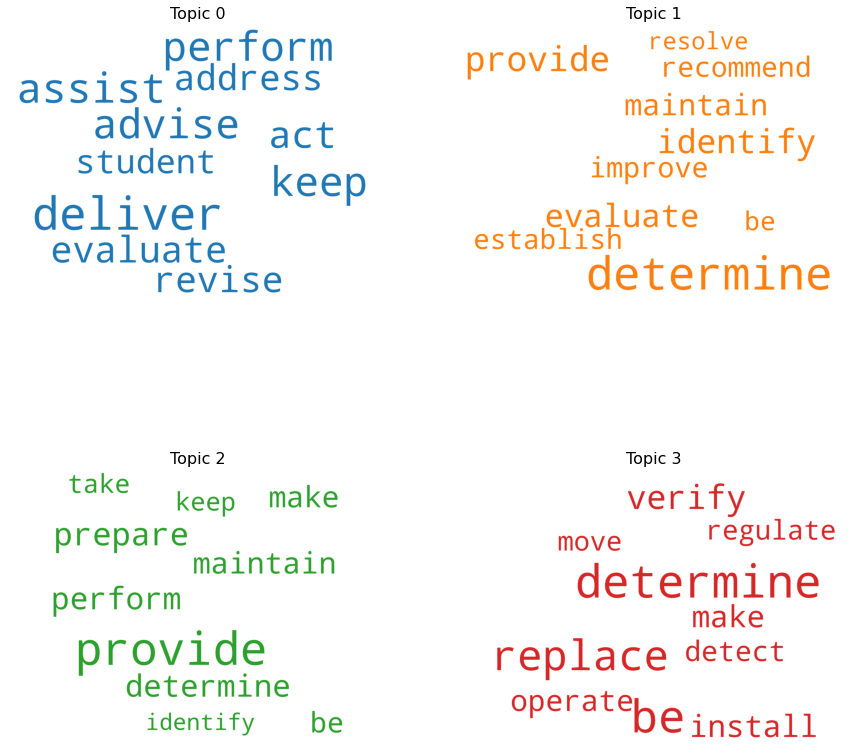

In [76]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

In [77]:
def format_topics_sentences(ldamodel=None, corpus=None, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=data["lemmatized"])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)


prediction_df_word2vec = pd.concat([df_grouped.reset_index()['Title'], df_dominant_topic], axis=1) 



In [98]:
#prediction_df_word2vec.sort_values('Dominant_Topic').to_csv('prediction_df_word2vec.csv')

In [79]:
prediction_df_word2vec[prediction_df_word2vec['Title'].isin(['Chief Executives','Meeting, Convention, and Event Planners','Cashiers'])]

,Title,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
119,Cashiers,119,1.0,0.6316,"determine, provide, identify, evaluate, maintain, improve, recommend, establish, be, resolve","[answer, provide, find, refund, provide, establish, identify, reconcile, keep, determine, redeem, check]"
128,Chief Executives,128,1.0,0.6441,"determine, provide, identify, evaluate, maintain, improve, recommend, establish, be, resolve","[coordinate, fund, maximize, evaluate, determine, maximize, increase, discus, solve, establish, serve, approve, coordinate, review, recommend, suggest, promote, recommend, promote, support, make, legislative, resolve, testify, serve, participate, promote, delegate, do, approve]"
573,"Meeting, Convention, and Event Planners",573,2.0,0.5941,"provide, prepare, perform, determine, maintain, make, be, take, keep, identify","[determine, approve, coordinate, determine, be, inquiry, plan, establish, monitor, keep, choose, publicize, erect, serve]"


In [111]:
prediction_df_word2vec[prediction_df_word2vec['Title'].isin(['Chief Executives', 'Transportation Managers', 'Meeting, Convention, and Event Planners', 'Social and Community Service Managers', 'Compliance Managers', 'Medical Transcriptionists',
               'Judicial Law Clerks', 'Paralegals and Legal Assistants', 'Human Resources Assistants, Except Payroll and Timekeeping', 'File Clerks', 'Credit Authorizers', 'Data Entry Keyers', 'Meter Readers, Utilities',
               'Physicists', 'Zoologists and Wildlife Biologists', 'Civil Engineers', 'Electrical Engineers', 'Economists'])].sort_values('Dominant_Topic').head()

,Title,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
128,Chief Executives,128,1.0,0.6441,"determine, provide, identify, evaluate, maintain, improve, recommend, establish, be, resolve","[coordinate, fund, maximize, evaluate, determine, maximize, increase, discus, solve, establish, serve, approve, coordinate, review, recommend, suggest, promote, recommend, promote, support, make, legislative, resolve, testify, serve, participate, promote, delegate, do, approve]"
852,Social and Community Service Managers,852,1.0,0.8765,"determine, provide, identify, evaluate, maintain, improve, recommend, establish, be, resolve","[establish, oversee, meet, evaluate, establish, maintain, meet, sign, determine, act, explain, interpret, determine, be]"
704,Physicists,704,1.0,0.7493,"determine, provide, identify, evaluate, maintain, improve, recommend, establish, be, resolve","[detect, measure, model, be, observe, explore, identify, apply, determine, determine, be]"
488,Judicial Law Clerks,488,1.0,0.8626,"determine, provide, identify, evaluate, maintain, improve, recommend, establish, be, resolve","[determine, keep, hear, verify, adequate]"
934,Transportation Managers,934,1.0,0.7953,"determine, provide, identify, evaluate, maintain, improve, recommend, establish, be, resolve","[serve, verify, resolve, coordinate, use, formulate, implement, authorize, increase, determine, improve, improve, maximize, reduce, provide]"


In [81]:
for i in set(prediction_df_word2vec['Dominant_Topic']):
      jobs_list = []
      for j in list(prediction_df_word2vec.loc[prediction_df_word2vec['Dominant_Topic']==i, 'Title']):
        jobs_list.append(j)
      
      print('cluster: ', i,' ',jobs_list)

      print('\n')


cluster:  0.0   ['Actors', 'Agents and Business Managers of Artists, Performers, and Athletes', 'Agricultural Sciences Teachers, Postsecondary', 'Anthropology and Archeology Teachers, Postsecondary', 'Architecture Teachers, Postsecondary', 'Area, Ethnic, and Cultural Studies Teachers, Postsecondary', 'Art, Drama, and Music Teachers, Postsecondary', 'Atmospheric, Earth, Marine, and Space Sciences Teachers, Postsecondary', 'Baggage Porters and Bellhops', 'Biological Science Teachers, Postsecondary', 'Business Teachers, Postsecondary', 'Chemistry Teachers, Postsecondary', 'Communications Teachers, Postsecondary', 'Community Health Workers', 'Computer Science Teachers, Postsecondary', 'Cooks, Restaurant', 'Criminal Justice and Law Enforcement Teachers, Postsecondary', 'Economics Teachers, Postsecondary', 'Education Teachers, Postsecondary', 'Electronic Home Entertainment Equipment Installers and Repairers', 'Engineering Teachers, Postsecondary', 'English Language and Literature Teachers, P

In [82]:
df = pd.DataFrame(topics[1][1][:15], columns = ['features', 'score'])
df

,features,score
0,determine,0.076389
1,provide,0.039350
2,identify,0.036669
3,evaluate,0.033843
4,maintain,0.028938
5,improve,0.025869
6,recommend,0.025129
7,establish,0.024575
8,be,0.021830
9,resolve,0.017883


In [83]:
topics[1][1][:15]

[('determine', 0.07638864),
 ('provide', 0.03934989),
 ('identify', 0.036668684),
 ('evaluate', 0.033842564),
 ('maintain', 0.028938051),
 ('improve', 0.025869142),
 ('recommend', 0.025129182),
 ('establish', 0.024574658),
 ('be', 0.02182966),
 ('resolve', 0.017883403)]

In [84]:
pd.DataFrame(topics[2][1][:15], columns = ['features', 'score'])

,features,score
0,provide,0.080022
1,prepare,0.032353
2,perform,0.029974
3,determine,0.029663
4,maintain,0.027976
5,make,0.027463
6,be,0.024923
7,take,0.021195
8,keep,0.020203
9,identify,0.016067


In [85]:
print(np.mean(pd.merge(pd.DataFrame(topics[0][1][:10], columns = ['features', 'score']), final, left_on='features', right_on='Verb', how = 'left')['automation_score']))
print(np.mean(pd.merge(pd.DataFrame(topics[1][1][:10], columns = ['features', 'score']), final, left_on='features', right_on='Verb', how = 'left')['automation_score']))
print(np.mean(pd.merge(pd.DataFrame(topics[2][1][:10], columns = ['features', 'score']), final, left_on='features', right_on='Verb', how = 'left')['automation_score']))
print(np.mean(pd.merge(pd.DataFrame(topics[3][1][:10], columns = ['features', 'score']), final, left_on='features', right_on='Verb', how = 'left')['automation_score']))

0.2155715811965812
0.3678961921648092
0.4199059263018785
0.29642857142857143


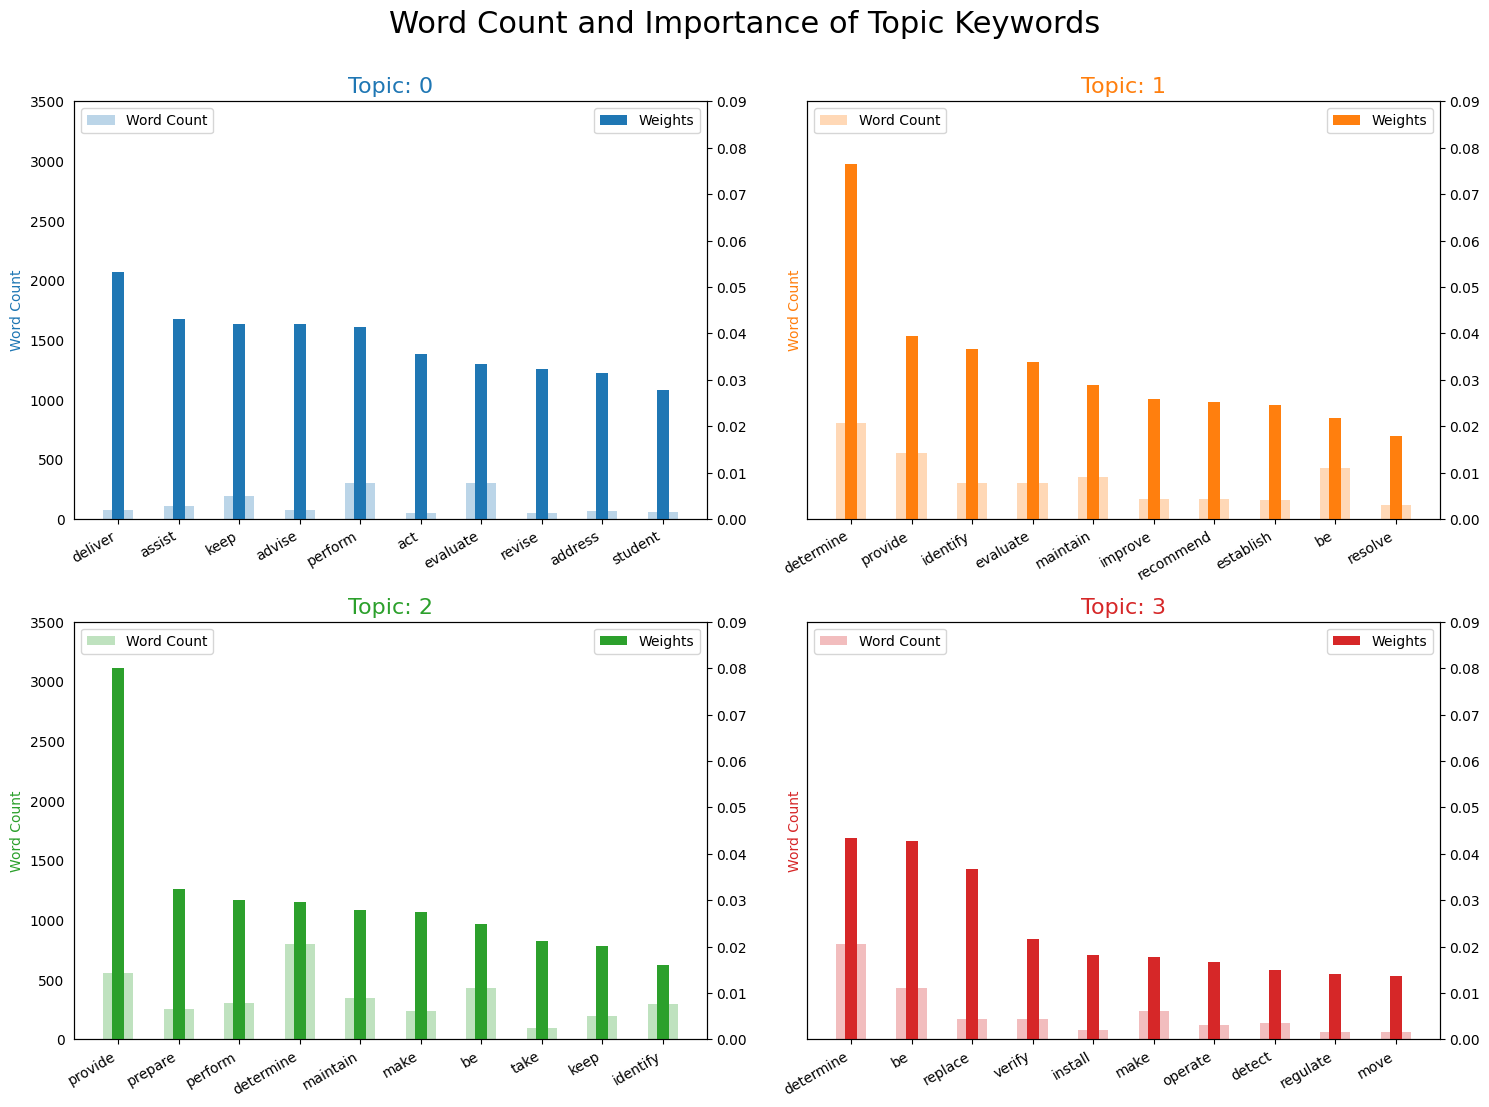

In [86]:
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data["lemmatized"] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(15,10.5), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.090); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

Text(0, 0.5, 'Number of documents')

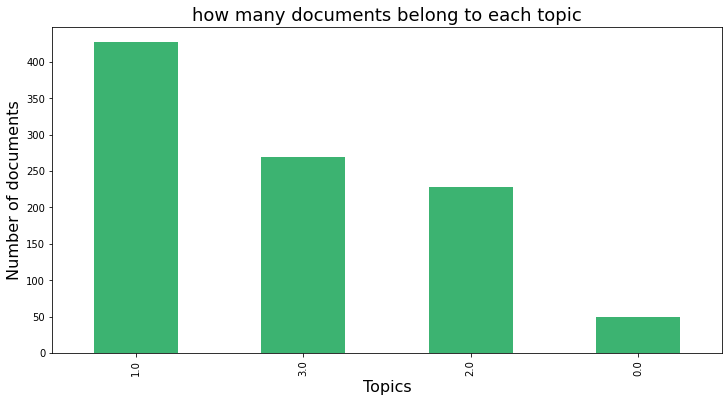

In [87]:
topic_counts = df_dominant_topic["Dominant_Topic"].value_counts()
topic_counts.plot(kind = "bar", color = "mediumseagreen", figsize = (12,6))
plt.title("how many documents belong to each topic", size = 18)
plt.xlabel("Topics", size = 16)
plt.ylabel("Number of documents", size = 16)

# Supervised Machine Learning


In [88]:
raw = pd.read_excel('O_NET Task Statements.xlsx')

master = raw[['Task ID', 'Title', 'Task Type', 'task_automation']]
model_raw = raw[['Task ID', 'Task']]
model_raw.head()

,Task ID,Task
0,8823,"Direct or coordinate an organization's financial or budget activities to fund operations, maximize investments, or increase efficiency."
1,8831,Appoint department heads or managers and assign or delegate responsibilities to them.
2,8825,"Analyze operations to evaluate performance of a company or its staff in meeting objectives or to determine areas of potential cost reduction, program improvement, or policy change."
3,8826,"Direct, plan, or implement policies, objectives, or activities of organizations or businesses to ensure continuing operations, to maximize returns on investments, or to increase productivity."
4,8827,"Prepare budgets for approval, including those for funding or implementation of programs."


In [89]:
master[master['task_automation'] == 1].count()
master[master['task_automation'] == 0].count()

Task ID            1303
Title              1303
Task Type          1301
task_automation    1303
dtype: int64

In [92]:
model_processed = model_raw.copy()
model_processed['Task_Cleaned'] = model_processed['Task'].apply(lambda x: x.lower()) 
#Remove Punctuations
model_processed['Task_Cleaned']=model_processed['Task_Cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x)) 
#Stop Words Removal
#sw_nltk = stopwords.words('english')
model_processed['Task_Cleaned'] = model_processed['Task_Cleaned'].apply(lambda x: ' '.join([item for item in x.split() if item not in sw_nltk]))
#Tokenize & Lemmatize Words
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
model_processed['Task_Cleaned'] = model_processed['Task_Cleaned'].apply(lemmatize_text)
model_processed.head()

,Task ID,Task,Task_Cleaned
0,8823,"Direct or coordinate an organization's financial or budget activities to fund operations, maximize investments, or increase efficiency.","[direct, coordinate, organization, financial, budget, activity, fund, operation, maximize, investment, increase, efficiency]"
1,8831,Appoint department heads or managers and assign or delegate responsibilities to them.,"[appoint, department, head, manager, assign, delegate, responsibility]"
2,8825,"Analyze operations to evaluate performance of a company or its staff in meeting objectives or to determine areas of potential cost reduction, program improvement, or policy change.","[analyze, operation, evaluate, performance, company, staff, meeting, objective, determine, area, potential, cost, reduction, program, improvement, policy, change]"
3,8826,"Direct, plan, or implement policies, objectives, or activities of organizations or businesses to ensure continuing operations, to maximize returns on investments, or to increase productivity.","[direct, plan, implement, policy, objective, activity, organization, business, ensure, continuing, operation, maximize, return, investment, increase, productivity]"
4,8827,"Prepare budgets for approval, including those for funding or implementation of programs.","[prepare, budget, approval, including, funding, implementation, program]"


In [93]:
data = model_processed['Task_Cleaned'].apply(lambda x: ','.join(map(str, x))) ## all words
data = data.apply(lambda x: x.replace(',',' '))
sample = data[0] ## you can play around the index here to see other examples
print(sample)
tokens = [nltk.word_tokenize(sent) for sent in [sample]]
postag = [nltk.pos_tag(sent) for sent in tokens]
postag[0]

direct coordinate organization financial budget activity fund operation maximize investment increase efficiency


[('direct', 'JJ'),
 ('coordinate', 'NN'),
 ('organization', 'NN'),
 ('financial', 'JJ'),
 ('budget', 'NN'),
 ('activity', 'NN'),
 ('fund', 'NN'),
 ('operation', 'NN'),
 ('maximize', 'VB'),
 ('investment', 'NN'),
 ('increase', 'NN'),
 ('efficiency', 'NN')]

## Constructing "X"s

In [95]:
data = model_processed['Task_Cleaned'].apply(lambda x: ','.join(map(str, x))).to_frame()
data = data['Task_Cleaned'].apply(lambda x: x.split(',')[0])

tf_idf_vectorizor = TfidfVectorizer(max_features = 1000)

tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
model_processed_final = pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names())
model_processed_final.head()

all_data = pd.concat([master, model_processed_final], axis = 1)
model_ready = all_data[all_data['task_automation'].isin([0,1])]
model_evaluation = all_data[~all_data['task_automation'].isin([0,1])]
model_ready.head()

,Task ID,Title,Task Type,task_automation,accept,access,accompany,account,acquire,act,activate,adapt,add,address,adhere,adjust,administer,admit,advance,advertise,advise,advocate,affix,agree,aid,alert,align,allocate,allow,alter,amend,analyze,anchor,anesthetize,anneal,announce,answer,anticipate,appear,apply,...,unlock,unpack,unroll,unscrew,unwind,update,upgrade,upload,use,utilize,vacuum,validate,vary,verify,videotape,view,visit,visualize,visually,vote,walk,warn,wash,watch,water,waterproof,wax,wear,weigh,weld,wet,whiten,wind,wipe,wire,withdraw,witness,work,wrap,write
0,8823,Chief Executives,Core,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8831,Chief Executives,Core,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8825,Chief Executives,Core,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8826,Chief Executives,Core,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8827,Chief Executives,Core,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Construct function for outputing training and testing results

In [96]:
X = model_ready.drop(columns = ['Task ID', 'Title', 'Task Type', 'task_automation'], axis = 1)
y = model_ready['task_automation']

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_train, pred)}n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_test, pred)}n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2328)

### Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model_1 = LogisticRegression(random_state = 2328)
model_1.fit(X_train, y_train)
print_score(model_1, X_train, y_train, X_test, y_test, train=True)
print_score(model_1, X_train, y_train, X_test, y_test, train=False)

Train Result:n================================================
Accuracy Score: 76.72%
_______________________________________________
CLASSIFICATION REPORT:n                  0.0         1.0  accuracy    macro avg  weighted avg
precision    0.763699    0.805556  0.767241     0.784627      0.775606
recall       0.976999    0.239669  0.767241     0.608334      0.767241
f1-score     0.857280    0.369427  0.767241     0.613353      0.718494
support    913.000000  363.000000  0.767241  1276.000000   1276.000000
_______________________________________________
Confusion Matrix: n [[892  21]
 [276  87]]n
Test Result:n================================================
Accuracy Score: 74.64%
_______________________________________________
CLASSIFICATION REPORT:n                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.753535    0.679245   0.74635    0.716390      0.732116
recall       0.956410    0.227848   0.74635    0.592129      0.746350
f1-score     0.842938    0.341

In [124]:
X_eval = all_data.drop(columns = ['Task ID', 'Title', 'Task Type', 'task_automation'], axis = 1)
eval_pred = model_1.predict(X_eval)
model_evaluation_master = all_data[['Task ID', 'Title', 'Task Type']]
eval_final = pd.concat([model_evaluation_master.reset_index(drop = True), pd.DataFrame(eval_pred)], axis = 1)

In [135]:
eval_final[eval_final[0] == 0.0].count()
eval_final[eval_final[0] == 1.0].count()
eval_final.head()

,Task ID,Title,Task Type,0
0,8823,Chief Executives,Core,0.0
1,8831,Chief Executives,Core,0.0
2,8825,Chief Executives,Core,0.0
3,8826,Chief Executives,Core,0.0
4,8827,Chief Executives,Core,0.0


### Aggregation

In [127]:
agg_prediction_results = eval_final.groupby(['Title'])[0].mean().reset_index().sort_values(by = 0, ascending = True)
agg_prediction_results.head()

,Title,0
741,Product Safety Engineers,0.0
320,File Clerks,0.0
158,"Compensation, Benefits, and Job Analysis Specialists",0.0
319,Fiberglass Laminators and Fabricators,0.0
832,Septic Tank Servicers and Sewer Pipe Cleaners,0.0


### PwC jobs

In [128]:
list_of_jobs = ['Chief Executives', 'Transportation Managers', 'Meeting, Convention, and Event Planners', 'Social and Community Service Managers', 'Compliance Managers', 'Medical Transcriptionists',
               'Judicial Law Clerks', 'Paralegals and Legal Assistants', 'Human Resources Assistants, Except Payroll and Timekeeping', 'File Clerks', 'Credit Authorizers', 'Data Entry Keyers', 'Meter Readers, Utilities',\
               'Physicists', 'Zoologists and Wildlife Biologists', 'Civil Engineers', 'Electrical Engineers', 'Economists']

prediction_18jobs = agg_prediction_results[agg_prediction_results['Title'].isin(list_of_jobs)]
prediction_18jobs
prediction_18jobs.rename({0: 'Automatability'}, axis=1, inplace=True)
prediction_18jobs

,Title,Automatability
320,File Clerks,0.000000
852,Social and Community Service Managers,0.000000
704,Physicists,0.000000
569,Medical Transcriptionists,0.000000
578,"Meter Readers, Utilities",0.000000
128,Chief Executives,0.032258
934,Transportation Managers,0.071429
973,Zoologists and Wildlife Biologists,0.071429
249,Economists,0.076923
672,Paralegals and Legal Assistants,0.083333


### Prediction Result Analysis

In [131]:
agg_prediction_results[agg_prediction_results[0] == 0.0].count()
agg_prediction_results[agg_prediction_results[0] > 0.0].count()
prediction_results = pd.merge(eval_final, model_raw)
prediction_results[prediction_results[0] == 1.0].head()

,Task ID,Title,Task Type,0,Task
20,8844,Chief Executives,Supplemental,1.0,"Make presentations to legislative or other government committees regarding policies, programs, or budgets."
35,15382,Chief Sustainability Officers,Core,1.0,Monitor and evaluate effectiveness of sustainability programs.
53,20702,General and Operations Managers,Core,1.0,Monitor suppliers to ensure that they efficiently and effectively provide needed goods or services within budgetary limits.
73,15274,Legislators,NaN,1.0,Maintain knowledge of relevant national and international current events.
74,15275,Legislators,NaN,1.0,"Make decisions that balance the perspectives of private citizens, public officials, and party leaders."


### Automation Labelling Results

In [137]:
temp = pd.merge(model_processed, master)
temp = temp[temp['task_automation'].isin([0,1])]
temp1 = temp['Task_Cleaned'].apply(lambda x: ','.join(map(str, x))).to_frame()
temp1 = temp1['Task_Cleaned'].apply(lambda x: x.split(',')[0]).to_frame('keyVerb')
final = pd.concat([temp[['Task ID', 'Title', 'task_automation']].reset_index(drop = True), temp1.reset_index(drop = True)], axis = 1)
final1 = final.groupby(['keyVerb']).size().to_frame().reset_index()
final2 = final.groupby(['keyVerb'])['task_automation'].sum().to_frame().reset_index()


final = pd.merge(final1, final2)
final.columns = ['Verb', 'count', 'automation_score']
final.sort_values(by = 'automation_score', ascending = False).head(10)

,Verb,count,automation_score
239,prepare,82,27.0
193,maintain,35,21.0
265,record,20,18.0
227,perform,49,14.0
204,monitor,17,11.0
65,compile,15,11.0
251,provide,47,11.0
11,analyze,21,11.0
61,collect,16,10.0
218,order,11,10.0


### SVM

In [136]:
## Version 1 - raw input + SVM
from sklearn.svm import SVC
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:n================================================
Accuracy Score: 71.55%
_______________________________________________
CLASSIFICATION REPORT:n                  0.0    1.0  accuracy    macro avg  weighted avg
precision    0.715517    0.0  0.715517     0.357759      0.511965
recall       1.000000    0.0  0.715517     0.500000      0.715517
f1-score     0.834171    0.0  0.715517     0.417085      0.596864
support    913.000000  363.0  0.715517  1276.000000   1276.000000
_______________________________________________
Confusion Matrix: n [[913   0]
 [363   0]]n
Test Result:n================================================
Accuracy Score: 71.17%
_______________________________________________
CLASSIFICATION REPORT:n                  0.0    1.0  accuracy   macro avg  weighted avg
precision    0.711679    0.0  0.711679    0.355839      0.506487
recall       1.000000    0.0  0.711679    0.500000      0.711679
f1-score     0.831557    0.0  0.711679    0.415778      0.591801
suppo